<a href="https://colab.research.google.com/github/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9A%D0%9F_%E2%84%964-5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична робота №4-5

###Імпорт основних модулів

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##1. Відібрати на Kaggle.com набір даних, який містить я мінімум 1 категоріальну змінну та одну кількісну.



In [2]:
melb = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/Data/melb_data.csv")

In [3]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


 Видалимо пропуски наступною командою

In [4]:
melb = melb.dropna(subset=['BuildingArea'])
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


##2. На основі кількісної змінної(BuildingArea) згенеруємо нову змінну за правилом: кожен елемент стовпця (по черзі) множиться на випадкове значення від 1 до 5.

In [30]:
# Генерація нової змінної
np.random.seed(0) # Задаємо початкове значення для відтворюваності результатів
melb['NewBuildingArea'] = melb['BuildingArea'] * np.random.randint(1, 6, melb.shape[0])
melb[['BuildingArea', 'NewBuildingArea']].head()

,BuildingArea,NewBuildingArea
1,79.0,395.0
2,150.0,150.0
4,142.0,568.0
6,210.0,840.0
7,107.0,428.0


#3 Порівняти дві категорії з категоріальної змінної за алгоритмом:


In [6]:
melb[melb['Type'].isin(['h', 'u'])]
melb[['Type']]

,Type
1,h
2,h
4,h
6,h
7,h
...,...
13572,h
13573,h
13576,h
13578,h


In [7]:
melb[melb["Type"] == 'h']['BuildingArea'].shape

(4860,)

In [8]:
melb[melb["Type"] == 'u']['BuildingArea'].shape

(1584,)

In [9]:
melb["BuildingArea"].shape

(7130,)

##3.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

Тест для h

In [10]:
from scipy.stats import kstest, norm

data = melb[melb["Type"] == 'h']['BuildingArea']
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")


Статистика тесту = 0.41161;
p = 0.00000
Дані не мають нормального розподілу


Тест для u

In [11]:
from scipy.stats import kstest, norm

data = melb[melb["Type"] == 'u']['BuildingArea']
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")

Статистика тесту = 0.16886;
p = 0.00000
Дані не мають нормального розподілу


## 3.3. Дати коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.


In [12]:
melb_type = melb[melb["Type"].isin(["h", "u"])].groupby("Type")["BuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4860,176.866248,650.556175
u,1584,80.737121,50.631211


## 3.4. Візуалізувати групи за допомогою ящичкових діаграм.

In [13]:
h = melb[melb["Type"] == "h"]["BuildingArea"]
u = melb[melb["Type"] == "u"]["BuildingArea"]

In [14]:
h.shape

(4860,)

In [15]:
u.shape

(1584,)

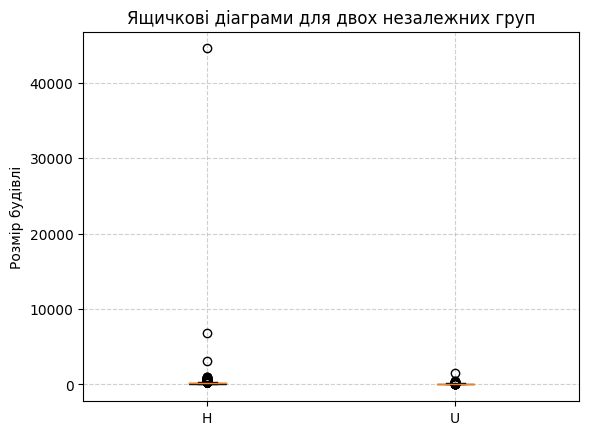

In [16]:
data = [h, u]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=["H", "U"])

# Покращення візуалізації
ax.set_title("Ящичкові діаграми для двох незалежних груп")
ax.set_ylabel ("Розмір будівлі")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Cпробуємо трохи покращити дані, використавши квантильний метод очищення даних від викидів

In [31]:
Q1 = melb['BuildingArea'].quantile(0.25)
Q3 = melb['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1

# Визначення меж
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

# Фільтрація
new_melb = melb[(melb['BuildingArea'] >= low) & (melb['BuildingArea'] <= upp)]

In [32]:
h = new_melb[new_melb["Type"] == "h"]["BuildingArea"]
u = new_melb[new_melb["Type"] == "u"]["BuildingArea"]

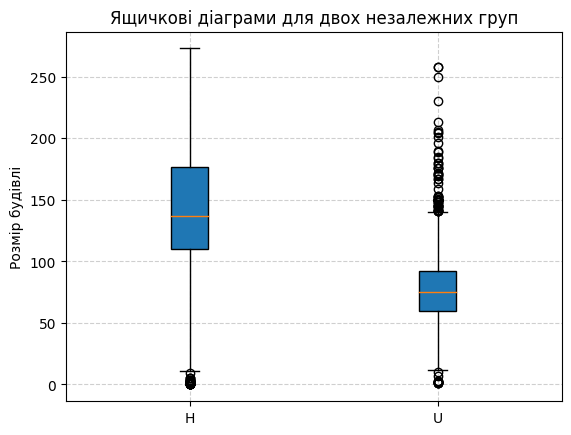

In [33]:
data = [h, u]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=["H", "U"])

# Покращення візуалізації
ax.set_title("Ящичкові діаграми для двох незалежних груп")
ax.set_ylabel ("Розмір будівлі")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [34]:
h.shape

(4408,)

In [35]:
u.shape

(1578,)

Після реалізації алгоритму очищення від викидів, бачимо, що це допомогло. Переконатись в цьому, можемо порівнявши 2 графіки або розміри даних `до/після`

## 3.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.(ОНОВЛЕНО)

In [36]:
melb_type = new_melb[new_melb["Type"].isin(["h", "u"])].groupby("Type")["BuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4408,145.099907,49.917026
u,1578,78.897719,30.060473


## 3.5. Сформувати нульову та альтернативну гіпотези.

Нульова гіпотеза (H0): Немає статистично значущої різниці між середніми цінами будинків (h) та квартир (u).

Альтернативна гіпотеза (H1): Існує статистично значуща різниця між середніми цінами будинків (h) та квартир (u).

## 3.6. Перевірити гіпотезу та зробити висновки про те, яка саме гіпотеза підтвердилась.

In [23]:
from scipy.stats import ttest_rel

In [24]:
n = min(len(u), len(h))

sample_h = h[:n]
sample_u = u[:n]

t_statistic, p_value = ttest_rel(sample_h, sample_u)

print(f"Статистика тесту: {t_statistic:.10f};\np-value: {p_value:.10f}")

Статистика тесту: 46.0136291774;
p-value: 0.0000000000


Отже, результати тесту показали, що p значення < 0.05, тому ми відкидаємо нульову гіпотезу та приймаємо альтернативну,  яка вказує на існування статистично значущої різниця між середніми розмірами будинків (h) та квартир (u)

# 4.Порівняти кількісну змінну з оригінального дата сету та згенеровану змінну за аналогічним алгоритмом.

##4.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

In [25]:
from scipy.stats import kstest, norm

data = melb["NewBuildingArea"]
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")

Статистика тесту = 0.08785;
p = 0.00000
Дані не мають нормального розподілу


## 4.3. Дати коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.


In [26]:
melb_type = melb[melb["Type"].isin(["h", "u"])].groupby("Type")["NewBuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4520,444.660351,276.290231
u,1578,234.549930,148.169739


## 4.4. Візуалізувати групи за допомогою ящичкових діаграм.

In [27]:
before_data = melb["BuildingArea"]
after_data = melb["NewBuildingArea"]

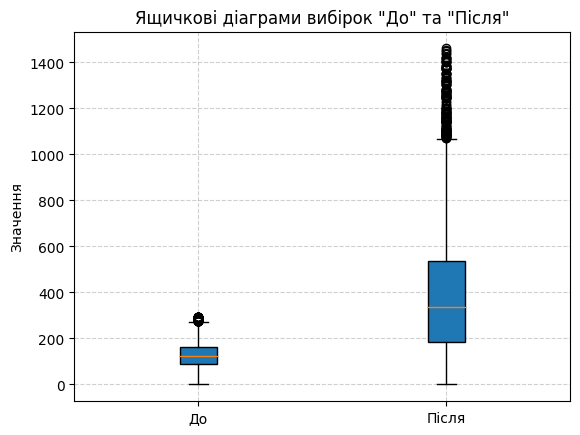

In [28]:
data = [before_data, after_data]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=['До', 'Після'])

# Покращення візуалізації
ax.set_title('Ящичкові діаграми вибірок "До" та "Після"')
ax.set_ylabel ('Значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 4.5. Сформувати нульову та альтернативну гіпотези.

Нульова гіпотеза (H0): Середні значення двох вибірок не відрізняються. Іншими словами, будь-яка різниця між вибірками "До" та "Після" випадкова або незначна.

Альтернативна гіпотеза (H1): Середні значення двох вибірок відрізняються. Це означає, що спостережувані різниці в значеннях між вибірками "До" та "Після" є статистично значущими.

In [29]:
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(before_data, after_data)
print(f"Статистика тесту: {t_statistic:.10f};\np-value: {p_value:.10f}")

Статистика тесту: -92.6853247857;
p-value: 0.0000000000


p-значення < 0.05, тому відкидаємо нульову гіпотезу та приймає альтернативну, що означає, що значення між вибірками "До" та "Після" є статистично значущими.

# Додатково

у даному пункті проведемо побудову групових ящиків з вусами для всіх груп, спочатку для однієї групи, але з різною кількісною змінною. Потім проведемо очищення даних від викидів та побудуємо груповий ящик з вусами для всіх груп та кількісних змінних(початкова/модифікована)

In [66]:
before_data = melb[melb["Type"] == "h"]["BuildingArea"]
after_data = melb[melb["Type"] == "h"]["NewBuildingArea"]

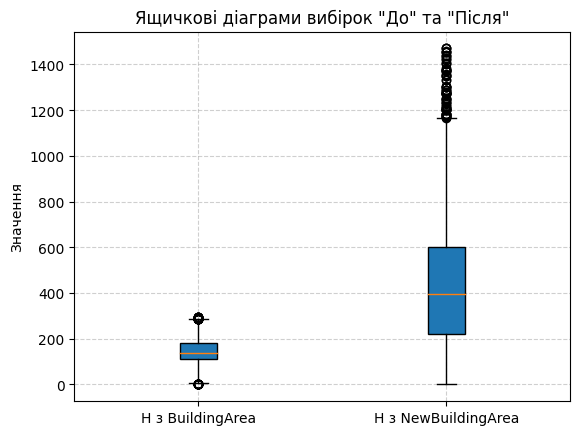

In [68]:
data = [before_data, after_data]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=['H з BuildingArea', 'H з NewBuildingArea'])

# Покращення візуалізації
ax.set_title('Ящичкові діаграми вибірок "До" та "Після"')
ax.set_ylabel ('Значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [39]:
before_data = melb[melb["Type"] == "u"]["BuildingArea"]
after_data = melb[melb["Type"] == "u"]["NewBuildingArea"]

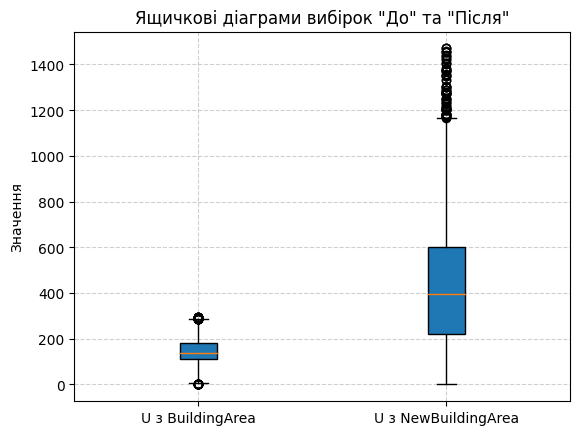

In [69]:
data = [before_data, after_data]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=['U з BuildingArea', 'U з NewBuildingArea'])

# Покращення візуалізації
ax.set_title('Ящичкові діаграми вибірок "До" та "Після"')
ax.set_ylabel ('Значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Очищення від викидів

In [41]:
Q1 = melb["BuildingArea"].quantile(0.25)
Q3 = melb["BuildingArea"].quantile(0.75)
IQR = Q3 - Q1

# Визначення меж
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

# Фільтрація
before_melb = melb[(melb["BuildingArea"] >= low) & (melb["BuildingArea"] <= upp)]

In [42]:
before_h = before_melb[before_melb["Type"] == "h"]["BuildingArea"]
before_u = before_melb[before_melb["Type"] == "u"]["BuildingArea"]

In [43]:
Q1 = melb["NewBuildingArea"].quantile(0.25)
Q3 = melb["NewBuildingArea"].quantile(0.75)
IQR = Q3 - Q1

# Визначення меж
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

# Фільтрація
after_melb = melb[(melb["NewBuildingArea"] >= low) & (melb["NewBuildingArea"] <= upp)]

In [44]:
after_h = after_melb[after_melb["Type"] == "h"]["NewBuildingArea"]
after_u = after_melb[after_melb["Type"] == "u"]["NewBuildingArea"]

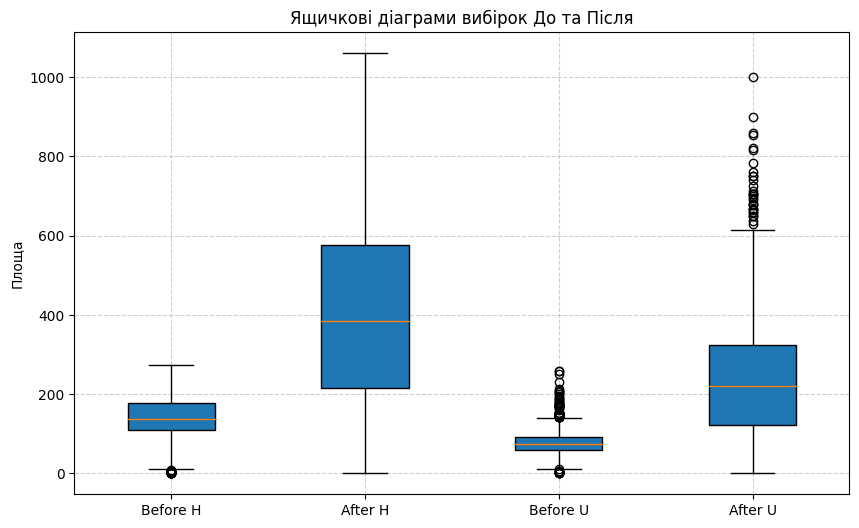

In [58]:
data = [before_h, after_h, before_u, after_u]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, patch_artist=True, labels=["Before H", "After H", "Before U", "After U"])


ax.set_title("Ящичкові діаграми вибірок До та Після")
ax.set_ylabel("Площа")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()